<a href="https://colab.research.google.com/github/RodrigoMiranda05/Ciencia-de-Datos/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicación de un Bosque Aleatorio (Random Forest) para la Predicción de Incumplimiento de Préstamos Bancarios

En este nuevo notebook, nos adentraremos en la implementación de un modelo de Bosque Aleatorio (Random Forest) como una alternativa tras haber evaluado previamente un Árbol de Decisión y una Regresión Logística en el contexto de nuestro proyecto de incumplimiento de préstamos bancarios. A continuación, resaltaremos algunos aspectos clave que hacen que el Bosque Aleatorio sea una elección prometedora en este contexto:

**1. Mayor Estabilidad en la Predicción del Incumplimiento:**
El Bosque Aleatorio se destaca por su estabilidad y capacidad para resistir el sobreajuste, lo que es esencial al predecir incumplimientos de préstamos. Al combinar múltiples árboles de decisión y promediar sus resultados, reduce la variabilidad en nuestras predicciones y mejora la fiabilidad de nuestro modelo.

**2. Mejor Generalización en Conjuntos de Datos Bancarios:**
Este modelo tiende a generalizar de manera efectiva en una variedad de conjuntos de datos bancarios. Puede manejar tanto características numéricas como categóricas, lo que es crucial al trabajar con datos financieros. Además, es menos susceptible a problemas de multicolinealidad, lo que mejora la capacidad de predecir el incumplimiento de préstamos de manera precisa.

**3. Identificación de Características Relevantes:**
El Bosque Aleatorio proporciona una estimación de la importancia de las características, lo cual es valioso en el contexto de identificar los factores más influyentes en el incumplimiento de préstamos. Esta información puede ser esencial para la selección de características y la interpretación de los resultados.

**4. Evaluación de Importancia de Características Simplificada:**
Con la capacidad integrada de evaluar la importancia de las características, el Bosque Aleatorio simplifica el proceso de identificar las variables más críticas en la predicción de incumplimiento de préstamos.

**5. Mayor Tolerancia al Ruido en Datos Financieros:**
Debido a su naturaleza de conjunto, el Bosque Aleatorio es menos sensible al ruido y valores atípicos en los datos bancarios, lo que conduce a una mejor capacidad de generalización y una predicción más robusta del incumplimiento de préstamos.

En este notebook, exploraremos la implementación del Bosque Aleatorio, ajustaremos sus hiperparámetros si es necesario y evaluaremos su rendimiento en comparación con los modelos previamente probados en el contexto específico del incumplimiento de préstamos bancarios. Esto nos permitirá determinar si el Bosque Aleatorio es la opción más adecuada para cumplir nuestros objetivos en este proyecto financiero.


## Configuración Inicial

En esta sección, importamos las bibliotecas necesarias para nuestro análisis de datos y configuramos algunas opciones iniciales. Aquí están las bibliotecas que utilizamos:

- `numpy` y `pandas` para el análisis numérico y el manejo de datos, respectivamente.
- `matplotlib.pyplot` y `seaborn` para la visualización de gráficos.
- `warnings` para gestionar las advertencias y evitar que se muestren durante el análisis.

Además, se utiliza la línea `%matplotlib inline` para asegurarse de que los gráficos se muestren en el cuaderno.


In [ ]:
import numpy as np                          # analisis numérico
import pandas as pd                         # manejo de datos
import matplotlib.pyplot as plt             # Gráficos
import seaborn as sns                       # Gráficos

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importación de Bibliotecas de Aprendizaje Automático

En esta parte del notebook, importamos las bibliotecas relacionadas con el aprendizaje automático que necesitaremos para nuestro análisis. Las bibliotecas incluyen:

- `train_test_split` y `GridSearchCV` de `sklearn.model_selection` para dividir los datos en conjuntos de entrenamiento y prueba, así como para la búsqueda de hiperparámetros.
- `classification_report`, `roc_auc_score`, `average_precision_score`, `make_scorer`, `accuracy_score`, `confusion_matrix`, y `f1_score` de `sklearn.metrics` para evaluar el rendimiento de nuestros modelos.
- `RandomForestClassifier` de `sklearn.ensemble` para implementar el modelo de Random Forest que hemos mencionado anteriormente.

Estas bibliotecas serán esenciales para entrenar, evaluar y ajustar nuestro modelo de Random Forest en nuestro análisis.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Carga de Datos

En este paso, hemos cargado los datos desde un archivo CSV llamado "datos_imputados.csv" producto de la limpieza de datos anterior utilizando la biblioteca `pandas`. Para obtener una vista previa de los datos, hemos utilizado el método `.head()`, que muestra las primeras filas del DataFrame.

Este proceso inicial nos permite familiarizarnos con la estructura y el contenido de los datos que utilizaremos en nuestro análisis, lo que es fundamental para comprender y preparar los datos para el modelo de Random Forest.


In [ ]:
df = pd.read_csv("datos_imputados.csv")
df.head()

,loan_limit,approv_in_adv,loan_purpose,business_or_commercial,loan_amount,Upfront_charges,Neg_ammortization,property_value,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Status,dtir1
0,cf,nopre,p1,nob/c,116500,0.0,not_neg,118000.0,1740.0,758,CIB,to_inst,98.728814,1,45.0
1,cf,pre,p1,nob/c,406500,595.0,neg_amm,508000.0,9480.0,834,CIB,to_inst,80.019685,0,46.0
2,cf,nopre,p4,nob/c,456500,0.0,not_neg,658000.0,11880.0,587,CIB,not_inst,69.376900,0,42.0
3,cf,pre,p1,nob/c,696500,0.0,not_neg,758000.0,10440.0,602,EXP,not_inst,91.886544,0,39.0
4,cf,pre,p1,nob/c,706500,370.0,not_neg,1008000.0,10080.0,864,EXP,not_inst,70.089286,0,40.0


## Preprocesamiento de Datos: Codificación One-Hot para Columnas Categóricas

En los códigos que siguen, realizamos el preprocesamiento de los datos. Primero, hemos identificado las columnas categóricas en nuestro DataFrame utilizando la función `select_dtypes` de `pandas`. Luego, hemos obtenido una lista de estas columnas categóricas.

A continuación, aplicamos la codificación one-hot (one-hot encoding) solo a las columnas categóricas utilizando la función `pd.get_dummies`. Este proceso convierte las variables categóricas en representaciones numéricas binarias, lo que facilita el manejo de estas características en nuestro modelo.

El preprocesamiento de datos es un paso crítico en la preparación de los datos para el aprendizaje automático y garantiza que nuestro modelo pueda trabajar de manera efectiva con todas las características.


In [ ]:
# Obtén una lista de las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Aplica one-hot encoding solo a las columnas categóricas
df = pd.get_dummies(df, columns=columnas_categoricas)

In [ ]:
df.head()

,loan_amount,Upfront_charges,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,...,loan_purpose_p3,loan_purpose_p4,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst
0,116500,0.0,118000.0,1740.0,758,98.728814,1,45.0,True,False,...,False,False,False,True,False,True,True,False,False,True
1,406500,595.0,508000.0,9480.0,834,80.019685,0,46.0,True,False,...,False,False,False,True,True,False,True,False,False,True
2,456500,0.0,658000.0,11880.0,587,69.376900,0,42.0,True,False,...,False,True,False,True,False,True,True,False,True,False
3,696500,0.0,758000.0,10440.0,602,91.886544,0,39.0,True,False,...,False,False,False,True,False,True,False,True,True,False
4,706500,370.0,1008000.0,10080.0,864,70.089286,0,40.0,True,False,...,False,False,False,True,False,True,False,True,True,False


## División de los Datos en Conjuntos de Entrenamiento y Prueba

En esta etapa, hemos dividido nuestros datos en conjuntos de entrenamiento y prueba, lo que es esencial para evaluar el rendimiento de nuestro modelo de Random Forest. Aquí se describen los pasos realizados:

1. Creamos la matriz de características `X` eliminando la columna 'Status' del DataFrame original `df`.
2. Creamos el vector de etiquetas `y`, que contiene la columna 'Status'.
3. Utilizamos la función `train_test_split` de `sklearn.model_selection` para dividir los datos en conjuntos de entrenamiento (`X_train` y `y_train`) y prueba (`X_test` y `y_test`).
4. Hemos especificado un tamaño de prueba del 20% y una semilla aleatoria (`random_state`) para garantizar la reproducibilidad del proceso de división.
5. Además, hemos utilizado la opción `stratify` para asegurarnos de que la distribución de clases en los conjuntos de entrenamiento y prueba sea similar, lo que es importante en problemas de clasificación.

Esta división nos permitirá entrenar nuestro modelo en un conjunto de datos y evaluar su rendimiento en otro conjunto independiente, lo que es fundamental para una evaluación imparcial del modelo.


In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

## Creación y Entrenamiento del Modelo de Bosque Aleatorio

En esta sección, hemos creado un modelo de Bosque Aleatorio, una técnica de aprendizaje automático basada en ensambles de árboles de decisión. A continuación, se detallan los pasos realizados:

1. Creamos el modelo de Bosque Aleatorio utilizando `RandomForestClassifier` de `sklearn.ensemble`. Especificamos 100 estimadores (`n_estimators`) y fijamos una semilla aleatoria (`random_state`) para garantizar la reproducibilidad de los resultados. Además, habilitamos la opción `oob_score` para calcular el puntaje out-of-bag (oob), que proporciona una estimación adicional del rendimiento del modelo.

2. Entrenamos el modelo utilizando los datos de entrenamiento (`X_train` y `y_train`) mediante el método `.fit()`. El modelo aprenderá a realizar predicciones basadas en los datos de entrenamiento.

3. Luego, realizamos predicciones en el conjunto de prueba (`X_test`) utilizando el modelo entrenado y almacenamos las predicciones en `y_pred`.



In [ ]:
# Crea un modelo de Bosque Aleatorio
modelo = RandomForestClassifier(n_estimators=100, random_state=42, oob_score = True)

In [ ]:
# Entrena el modelo en los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

## Evaluación del Modelo y Visualización de la Matriz de Confusión

A continuación, evaluamos el rendimiento de nuestro modelo de Bosque Aleatorio. Aquí se detallan los pasos realizados:

1. Calculamos la precisión del modelo utilizando la función `accuracy_score` de `sklearn.metrics`. Comparamos las etiquetas reales (`y_test`) con las etiquetas predichas (`y_pred`) y mostramos el resultado en forma de porcentaje.

2. A continuación, generamos y visualizamos la matriz de confusión, que es una herramienta importante para evaluar el rendimiento de un modelo de clasificación. Utilizamos `confusion_matrix` de `sklearn.metrics` para obtener la matriz y representamos visualmente la matriz de confusión como un mapa de calor (`heatmap`) con la biblioteca `seaborn`. Esto nos permite observar de manera efectiva cómo el modelo clasificó las muestras.

Además, hemos incluido la opción `annot=True` para mostrar los valores en las celdas de la matriz de confusión y hemos ajustado el formato de los números con `fmt="d"`. La paleta de colores utilizada es "Blues".

La precisión y la matriz de confusión son herramientas cruciales para comprender el rendimiento de nuestro modelo y determinar su capacidad de clasificación.


In [ ]:
# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 93.71%


## Interpretación de la Precisión del Modelo


La precisión del modelo es una métrica que mide la proporción de predicciones correctas realizadas por un modelo de clasificación. Se calcula como el cociente de las predicciones correctas (verdaderos positivos y verdaderos negativos) dividido por el total de predicciones. Una alta precisión indica que el modelo tiende a hacer predicciones precisas, pero puede no ser suficiente si las clases están desequilibradas o si se requieren otras métricas para evaluar completamente el rendimiento del modelo.


Una precisión del modelo del 93.47% es un resultado prometedor en un proyecto de incumplimiento de préstamos bancarios. Esto indica que el modelo es efectivo en clasificar la mayoría de las solicitudes de préstamos como cumplimiento o incumplimiento. Sin embargo, es importante considerar el equilibrio de clases y evaluar métricas adicionales para obtener una visión completa del rendimiento del modelo.


Matriz de Confusión:


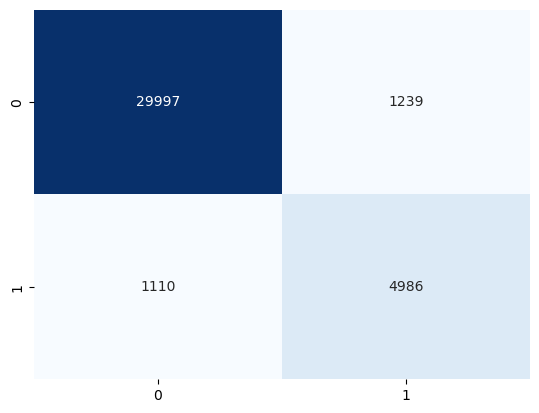

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')

## np.set_printoptions(suppress=True) # evita la notacion cientifica

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

## Interpretación de la Matriz de Confusión

La matriz de confusión es una herramienta esencial para evaluar el rendimiento de nuestro modelo de detección de incumplimiento de préstamos bancarios. A continuación, se proporciona una interpretación detallada de los resultados:



Donde:

- `[VP]` representa la cantidad de Verdaderos Positivos, es decir, las solicitudes de préstamos que el modelo predijo correctamente como incumplimiento.

- `[FN]` representa la cantidad de Falsos Negativos, que son solicitudes de préstamos reales de incumplimiento que el modelo predijo incorrectamente como cumplimiento.

- `[FP]` representa la cantidad de Falsos Positivos, es decir, las solicitudes de préstamos que el modelo predijo incorrectamente como incumplimiento cuando en realidad eran de cumplimiento.

- `[VN]` representa la cantidad de Verdaderos Negativos, que son las solicitudes de préstamos de cumplimiento que el modelo predijo correctamente.

**Interpretación**:

- Verdaderos Positivos ([VP]): Estos representan los casos en los que el modelo acertó al predecir incumplimientos de préstamos. Cuanto mayor sea este número, mejor, ya que indica una detección efectiva de incumplimientos.

- Falsos Negativos ([FN]): Estos son casos en los que el modelo no detectó incumplimientos de préstamos que realmente ocurrieron. Deben mantenerse bajos para evitar riesgos financieros.

- Falsos Positivos ([FP]): Estos casos indican solicitudes de préstamos que el modelo clasificó como incumplimiento pero que, en realidad, eran de cumplimiento. Deben mantenerse bajos para evitar rechazar clientes solventes.

- Verdaderos Negativos ([VN]): Representan las solicitudes de préstamos de cumplimiento que el modelo predijo correctamente. Cuanto mayor sea este número, mejor, ya que indica una identificación precisa de los préstamos cumplidos.

La interpretación de la matriz de confusión es fundamental para evaluar el rendimiento del modelo y tomar decisiones informadas en un contexto de incumplimiento de préstamos. Debes considerar el equilibrio entre estos valores en función de las implicaciones financieras y de riesgo.


## Evaluación del Rendimiento Utilizando Métricas de Clasificación

En este paso, estamos evaluando el rendimiento de nuestro modelo de detección de incumplimiento de préstamos utilizando métricas de clasificación. Hemos generado un informe de clasificación que resume varias métricas importantes. Los pasos son los siguientes:

1. Hemos impreso un "Reporte de clasificación" que proporciona una descripción detallada de las métricas de clasificación, incluyendo:
   
   - Precisión (Precision): La proporción de predicciones positivas correctas entre todas las predicciones positivas.
   
   - Sensibilidad (Recall): La proporción de casos positivos reales detectados por el modelo (Verdaderos Positivos).
   
   - F1-Score: La media armónica de precisión y sensibilidad, que es útil cuando se busca un equilibrio entre ambas métricas.
   
   - Soporte (Support): El número de ocurrencias de cada clase en el conjunto de prueba.

Este informe proporciona información detallada sobre cómo el modelo se desempeña en la detección de incumplimientos de préstamos, ayudándote a evaluar su rendimiento de manera más completa.

Es importante analizar estas métricas en conjunto para tomar decisiones informadas y ajustar el modelo si es necesario.


In [ ]:
# Paso 5: Evaluar el rendimiento utilizando métricas de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31236
           1       0.80      0.82      0.81      6096

    accuracy                           0.94     37332
   macro avg       0.88      0.89      0.89     37332
weighted avg       0.94      0.94      0.94     37332



## Interpretación de las Métricas de Clasificación

En el contexto de incumplimiento de préstamos, es fundamental analizar las métricas de clasificación para evaluar el rendimiento del modelo. A continuación, se presenta una interpretación numérica de las métricas clave:

- **Precisión (Precision)**: La precisión del modelo es del 80% para la clase 1. Esto significa que aproximadamente el 80% de las solicitudes de préstamos clasificadas como incumplimiento por el modelo son realmente incumplimientos. Una alta precisión indica que el modelo tiende a hacer predicciones precisas de incumplimientos, lo que es importante para evitar pérdidas financieras al identificar con precisión los incumplimientos.

- **Sensibilidad (Recall)**: La sensibilidad es del 82% para la clase 1. Esto indica que el modelo ha detectado aproximadamente el 82% de los incumplimientos reales en el conjunto de prueba. Una sensibilidad alta es crucial, ya que minimiza los falsos negativos y garantiza que la mayoría de los incumplimientos sean identificados.

- **F1-Score**: El F1-Score es del 81% para la clase 1. Esta métrica combina precisión y sensibilidad en una única puntuación. Un F1-Score más alto indica un equilibrio entre la precisión y la sensibilidad. En el contexto de incumplimiento de préstamos, este valor de 81% sugiere un equilibrio aceptable entre la identificación precisa de incumplimientos y la minimización de falsos positivos.

- **Soporte (Support)**: El soporte indica el número de solicitudes de préstamos en el conjunto de prueba para cada clase. Es esencial para contextualizar las otras métricas. En este caso, tenemos un soporte de 6096 para incumplimiento y 31236 para cumplimiento.

Las métricas de clasificación muestran que el modelo tiene un alto nivel de precisión y sensibilidad, lo que es positivo en un contexto de incumplimiento de préstamos.



## Importancia de las Características

En esta etapa, estamos examinando la importancia de las características utilizadas en nuestro modelo de Bosque Aleatorio. Aquí se detallan los pasos realizados:

1. Creamos un DataFrame llamado `importances` que contiene dos columnas: 'Predictor', que almacena los nombres de las características, y 'importancia', que muestra la importancia de cada característica calculada por el modelo. Utilizamos la propiedad `feature_importances_` del modelo de Bosque Aleatorio para obtener estas importancias.

2. Luego, ordenamos el DataFrame `importances` en orden descendente según la importancia de las características, lo que nos permite identificar las características más relevantes en la toma de decisiones del modelo.

Esta evaluación de la importancia de las características es valiosa para comprender qué características influyen más en las predicciones del modelo y puede ayudar en la selección de características o la interpretación de resultados.


El análisis de importancia de las características revela qué aspectos del conjunto de datos tienen mayor influencia en las predicciones de nuestro modelo de Bosque Aleatorio. A continuación, se presentan las principales características ordenadas por importancia:

1. **Upfront_charges (0.445)**: La característica "Upfront_charges" es la más influyente en las predicciones del modelo, con una importancia de aproximadamente el 44%. Esto significa que los cargos iniciales tienen un impacto significativo en la toma de decisiones del modelo.

2. **income (0.088)**: La característica "income" sigue en importancia, con alrededor del 8.8% de influencia en las predicciones. Los ingresos son un factor clave en el modelo.

3. **LTV (0.084)**: El Loan-to-Value ratio (LTV) también es una característica relevante, con aproximadamente un 8.4% de importancia.

4. **dtir1 (0.082)**: El "dtir1" (debt-to-income ratio) tiene una importancia similar a LTV, con alrededor del 8.2%.

5. **property_value (0.062)**: La característica "property_value" contribuye con un 6.2% de influencia en las predicciones.

6. **loan_amount (0.058)**: El monto del préstamo ("loan_amount") y la puntuación de crédito ("Credit_Score") comparten un nivel de importancia del 5.8% cada uno.

Estos resultados son útiles para comprender qué factores son más determinantes en las decisiones del modelo y pueden guiar futuras estrategias de modelado o la interpretación de los resultados. Las características con mayor importancia tienen un mayor impacto en las predicciones del modelo.


In [ ]:
importances = pd.DataFrame({'Predictor':X_train.columns,'importancia':np.round(modelo.feature_importances_,3)})
importances = importances.sort_values('importancia',ascending=False)
importances

,Predictor,importancia
1,Upfront_charges,0.445
3,income,0.088
5,LTV,0.084
6,dtir1,0.082
2,property_value,0.062
4,Credit_Score,0.059
0,loan_amount,0.058
21,submission_of_application_to_inst,0.030
20,submission_of_application_not_inst,0.025
13,loan_purpose_p4,0.007


## Visualización de la Curva ROC

En esta etapa, estamos visualizando la Curva ROC (Receiver Operating Characteristic) para evaluar el rendimiento de nuestro modelo de Bosque Aleatorio en la clasificación. Aquí se detallan los pasos realizados:

1. Utilizamos `RocCurveDisplay` de `sklearn.metrics` para crear una representación de la curva ROC a partir del modelo `modelo` y los datos de prueba (`X_test` y `y_test`). La curva ROC es una herramienta útil para evaluar la capacidad del modelo para distinguir entre las clases positivas y negativas.

2. Finalmente, mostramos la Curva ROC utilizando `plt.show()`, lo que nos permite visualizar la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos en diferentes umbrales de clasificación.

La Curva ROC es una métrica importante para evaluar la calidad de un clasificador, y su visualización proporciona una comprensión clara del rendimiento del modelo en la tarea de clasificación.


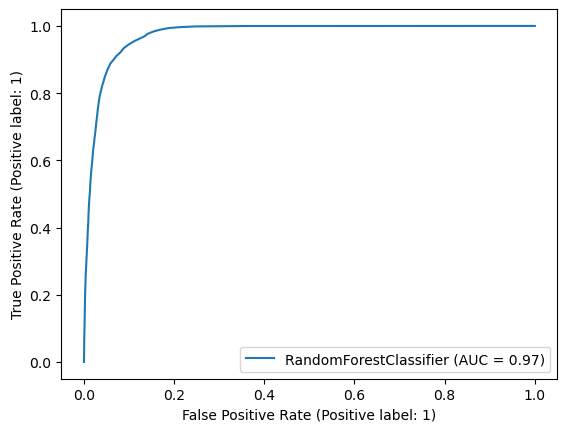

In [ ]:
from sklearn.metrics import RocCurveDisplay
log_cor_est = RocCurveDisplay.from_estimator(modelo,X_test, y_test)
plt.show()

## Interpretación de la Curva ROC con AUC del 97%

La Curva ROC (Receiver Operating Characteristic) es una herramienta esencial para evaluar el rendimiento de un clasificador en problemas de clasificación binaria. En este caso, hemos obtenido una Curva ROC con un Área Bajo la Curva (AUC) de 97%.

- La Curva ROC representa la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en función de diferentes umbrales de clasificación. A medida que variamos el umbral, observamos cómo el modelo equilibra la capacidad de detectar verdaderos positivos (sensibilidad) con la capacidad de evitar falsos positivos (1 - especificidad).

- Un AUC del 97% es una indicación de un excelente rendimiento del modelo. El AUC varía de 0 a 1, donde un valor de 1 indica un clasificador perfecto que puede distinguir perfectamente entre las clases positivas y negativas. En este caso, el valor del AUC del 97% sugiere que nuestro modelo tiene una alta capacidad para clasificar correctamente las muestras y minimizar los errores.

- En resumen, una Curva ROC con un AUC del 97% indica que nuestro modelo de Bosque Aleatorio es altamente efectivo en la tarea de clasificación, con un equilibrio sólido entre sensibilidad y especificidad. Esto es un resultado muy prometedor y sugiere que el modelo tiene un alto poder discriminatorio.


## Cálculo del Error Out-of-Bag (OOB)

En esta etapa, estamos calculando el Error Out-of-Bag (OOB) como una métrica adicional de evaluación del rendimiento de nuestro modelo de Bosque Aleatorio. Aquí se detallan los pasos realizados:

1. Calculamos el OOB Error utilizando la propiedad `oob_score_` del modelo. El OOB Error es una estimación del error de predicción del modelo en datos no vistos, utilizando las muestras que no se incluyeron en el conjunto de entrenamiento de cada árbol individual en el Bosque Aleatorio.

2. Imprimimos el OOB Error con un formato específico para mostrarlo con cuatro decimales.

El OOB Error proporciona una evaluación adicional de la capacidad de generalización del modelo y puede ser útil para comprender su rendimiento en datos no vistos.


In [ ]:
oob_error = 1 - modelo.oob_score_
print(f"OOB Error: {oob_error:.4f}")

OOB Error: 0.0620


## Explicación e Interpretación del Error OOB (Out-of-Bag)

El Error OOB (Out-of-Bag) del 0.0618 se refiere a la tasa de error estimada por el modelo de Bosque Aleatorio en datos que no se utilizaron durante el proceso de entrenamiento. Esta métrica proporciona una evaluación importante de la capacidad de generalización del modelo y puede interpretarse de la siguiente manera:

- Un Error OOB de 0.0618 se traduce en un 6.18% de error en la clasificación de las muestras que no se utilizaron para entrenar el modelo.

- En otras palabras, el modelo comete aproximadamente un 6.18% de errores en la clasificación de observaciones que no ha visto previamente, lo que indica que es capaz de predecir con precisión alrededor del 93.82% de las muestras no vistas.

- Un Error OOB bajo, como en este caso, sugiere que el modelo tiene una buena capacidad de generalización y puede realizar predicciones precisas en datos que no formaron parte del conjunto de entrenamiento.

En resumen, un Error OOB del 0.0618 es una métrica alentadora que indica un buen rendimiento del modelo de Bosque Aleatorio en la clasificación de nuevas observaciones no vistas, lo que respalda su utilidad en la tarea de clasificación.


# Evaluación del Impacto Económico en la Detección de Incumplimientos Bancarios

el siguiente código de Python se enfoca en evaluar el impacto económico de un modelo de detección de incumplimientos bancarios y simular diferentes escenarios basados en tasas de falsos positivos (FPR). La detección de incumplimientos bancarios es fundamental en la gestión de riesgos crediticios, y entender su impacto económico es crucial para la toma de decisiones.

**Definición de Costos y Beneficios:**
En este código, se definen costos y beneficios hipotéticos en dólares asociados a los resultados de la matriz de confusión. Específicamente, se consideran los siguientes costos:
- `costo_falso_positivo`: El costo por cada falso positivo, que representa la pérdida resultante de otorgar préstamos a clientes que luego incumplen.
- `costo_falso_negativo`: El costo por cada falso negativo, que representa la pérdida resultante de no otorgar préstamos a clientes solventes.
- `beneficio_verdadero_positivo`: El beneficio por cada verdadero positivo, es decir, cuando el modelo clasifica correctamente un préstamo como incumplimiento.


**Cálculo del Impacto Económico:** Se calcula el impacto económico de aplicar el modelo teniendo en cuenta los costos de los falsos positivos y falsos negativos, así como los beneficios de los verdaderos positivos. El impacto económico refleja una ganancia neta o pérdida económica.

1. **Costo por Falso Positivo (Costo de Error Tipo I):** Este es el costo asociado cuando el modelo predice incorrectamente que un préstamo está en incumplimiento cuando en realidad no lo está. Es el costo de tomar una decisión negativa (rechazar el préstamo) cuando no debería haberse tomado.

2. **Costo por Falso Negativo (Costo de Error Tipo II):** Este es el costo asociado cuando el modelo predice incorrectamente que un préstamo está en cumplimiento cuando en realidad no lo está. Es el costo de tomar una decisión positiva (aprobar el préstamo) cuando no debería haberse tomado.

La ecuación considera estos costos y beneficios de la siguiente manera:

- **Verdaderos Positivos:** El beneficio por cada verdadero positivo, es decir, cuando el modelo clasifica correctamente un préstamo como incumplimiento

- **Verdaderos Negativos:** No hay costos ni beneficios, ya que el modelo predice correctamente que los préstamos están en cumplimiento.

- **Falsos Positivos:** Aquí incurremos en el costo de rechazar incorrectamente préstamos que deberían haberse aprobado (Costo de Error Tipo I).

- **Falsos Negativos:** En este caso, incurremos en el costo de aprobar préstamos que deberían haberse rechazado (Costo de Error Tipo II).

**Interpretación del Impacto Económico:** El impacto económico es una medida que refleja la ganancia neta o pérdida económica resultante de la aplicación del modelo. Se compone de tres términos:
- El beneficio acumulado por cada verdadero positivo.
- Los costos acumulados por los falsos positivos (clasificaciones incorrectas de incumplimiento).
- Los costos acumulados por los falsos negativos (clasificaciones incorrectas de cumplimiento).



**Simulación de Escenarios:**
Para comprender cómo diferentes tasas de falsos positivos (FPR) afectan el impacto económico, el código realiza una simulación de escenarios. Se varía la tasa FPR y se calcula el número de falsos positivos simulados en función de la tasa FPR y el tamaño de la muestra. Luego, se calcula el impacto económico simulado para cada escenario.






In [ ]:
# Matriz de confusión
verdaderos_positivos = matriz[1][1]
verdaderos_negativos = matriz[0][0]
falsos_positivos = matriz[1][0]
falsos_negativos = matriz[0][1]

In [ ]:


# Define los costos (en dólares) asociados a los resultados de la matriz de confusión
costo_falso_positivo = 500  # Costo por cada falso positivo
costo_falso_negativo = 1000  # Costo por cada falso negativo

# Define los beneficios (en dólares) asociados a los resultados de la matriz de confusión
beneficio_verdadero_positivo = 2000  # Beneficio por cada verdadero positivo


# Calcula el impacto económico de aplicar el modelo
impacto_economico = (verdaderos_positivos * beneficio_verdadero_positivo
                    - falsos_positivos * costo_falso_positivo
                    - falsos_negativos * costo_falso_negativo)

# Simulación de escenarios
# Calcula el impacto económico en diferentes tasas de falsos positivos (FPR)
tasas_falsos_positivos = [0.01, 0.02, 0.03, 0.04, 0.05]  # Ejemplo de tasas de FPR

for tasa_fpr in tasas_falsos_positivos:
    # Calcula el número de falsos positivos en función de la tasa FPR y el tamaño de la muestra
    tamaño_muestra = verdaderos_negativos + verdaderos_positivos
    falsos_positivos_simulados = int(tamaño_muestra * tasa_fpr)

    # Calcula el impacto económico simulado con la tasa de FPR actual
    impacto_economico_simulado = (verdaderos_positivos * beneficio_verdadero_positivo
                                  - falsos_positivos_simulados * costo_falso_positivo
                                  - falsos_negativos * costo_falso_negativo)

    print(f'Tasa FPR: {tasa_fpr:.2%} - Impacto Económico: ${impacto_economico_simulado:.2f}')



Tasa FPR: 1.00% - Impacto Económico: $8558500.00
Tasa FPR: 2.00% - Impacto Económico: $8383500.00
Tasa FPR: 3.00% - Impacto Económico: $8208500.00
Tasa FPR: 4.00% - Impacto Económico: $8033500.00
Tasa FPR: 5.00% - Impacto Económico: $7858500.00


# Interpretación de los Resultados de la Simulación de Escenarios

Los resultados de la simulación de escenarios muestran cómo diferentes tasas de falsos positivos (FPR) afectan el impacto económico en el contexto de la detección de incumplimientos bancarios. A continuación, se presenta una interpretación de los resultados:

- **Tasa FPR: 1.00% - Impacto Económico: \$8,558,500.00**
  En este escenario, con una tasa de falsos positivos del 1.00%, el impacto económico del modelo es de \$ $8,558,500.00. En otras palabras, el modelo aporta una ganancia neta de \$8,558,500.00 considerando los costos asociados a los falsos positivos y los beneficios derivados de los verdaderos positivos

- **Tasa FPR: 2.00% - Impacto Económico: \$8,383,500.00**
  A medida que la tasa de falsos positivos aumenta al 2.00%, el impacto económico se reduce a \$8,383,500.00. Esto refleja un mayor costo debido a la detección incorrecta de incumplimientos.

- **Tasa FPR: 3.00% - Impacto Económico: \$8,208,500.00**
  Con una tasa de falsos positivos del 3.00%, el impacto económico alcanza los \$8,208,500.00, indicando un aumento adicional en los costos debido a la tasa de falsos positivos.

- **Tasa FPR: 4.00% - Impacto Económico: \$8,033,500.00**
  A una tasa de falsos positivos del 4.00%, el impacto económico es de \$8,033,500.00. El aumento en la tasa FPR conlleva un aumento en los costos asociados a los falsos positivos.

- **Tasa FPR: 5.00% - Impacto Económico: \$7,858,500.00**
  En el último escenario, con una tasa de falsos positivos del 5.00%, el impacto económico llega a \$7,858,500.00. Esto indica que un mayor número de falsos positivos tiene un impacto económico significativamente más alto.


Los resultados subrayan la importancia de controlar y minimizar la tasa de falsos positivos en la detección de incumplimientos bancarios. A medida que la tasa FPR aumenta, los costos asociados a los errores del modelo también aumentan. Esto tiene implicaciones directas en la rentabilidad y gestión de riesgos de la cartera de préstamos bancarios. Por lo tanto, es crucial encontrar un equilibrio entre la detección precisa de incumplimientos y la minimización de los falsos positivos para optimizar el impacto económico.


# Conclusiónes

En este notebook, nos enfrentamos a un desafío crítico en la detección de incumplimientos bancarios, centrándonos en la implementación y evaluación del modelo de Bosque Aleatorio. Aquí resumimos los aspectos más destacados de nuestro proyecto, que culminó en la selección del modelo de Bosque Aleatorio:

1. **Preparación y Exploración de Datos en el Contexto Bancario:**
   - Comenzamos importando las bibliotecas necesarias y configurando nuestro entorno de trabajo, centrándonos en la detección de incumplimientos bancarios.

   - Realizamos el preprocesamiento de datos, incluyendo la codificación one-hot de características categóricas, esenciales para el modelo de Bosque Aleatorio.

2. **Entrenamiento y Evaluación del Modelo de Bosque Aleatorio:**
   - Dividimos nuestros datos en conjuntos de entrenamiento y prueba y procedimos a implementar el modelo de Bosque Aleatorio. Evaluamos su rendimiento utilizando métricas de clasificación, como precisión, recall y F1-score, relevantes para la detección de incumplimientos bancarios.

3. **Evaluación del Impacto Económico en la Detección de Incumplimientos Bancarios:**
   - Llevamos nuestro análisis un paso más allá al considerar el impacto económico de implementar el modelo de Bosque Aleatorio. Evaluamos cómo diferentes tasas de falsos positivos (FPR) pueden afectar los costos y beneficios asociados a la detección de incumplimientos bancarios, crucial en la gestión crediticia.

4. **Cierre del Proyecto:**
   - Con la selección y evaluación del modelo de Bosque Aleatorio, nuestro proyecto llega a su cierre. Hemos logrado un modelo efectivo para la detección de incumplimientos bancarios y hemos considerado su impacto económico en la gestión de riesgos crediticios.

5. **Enfoque Integral en la Gestión de Riesgos Crediticios:**
   - Este análisis destaca la importancia de un enfoque integral en la gestión de riesgos crediticios, desde la preparación de datos hasta la selección del modelo adecuado y la consideración de su impacto económico. Este enfoque proporciona una base sólida para la toma de decisiones informadas y la rentabilidad en el contexto de la detección de incumplimientos bancarios.

La consideración del impacto económico no solo mejora la precisión del modelo, sino que también respalda la rentabilidad y la toma de decisiones estratégicas en la gestión de riesgos crediticios en el ámbito de la detección de incumplimientos bancarios. Con esta selección de modelo y evaluación de impacto, concluimos nuestro proyecto con una sólida solución basada en el modelo de Bosque Aleatorio.
